In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
pd.options.display.max_columns = None

In [5]:
data = pd.read_csv('input/train.csv')

In [6]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [7]:
data.shape

(10000, 20)

In [8]:
data['Id'].nunique()

10000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


#### Healthcare_1

In [10]:
data = data.drop('Healthcare_1', axis=1)

In [11]:
data.shape

(10000, 19)

#### describe

In [12]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


Пример использования медианы (4 друга - заработные платы в тыс. руб.)

In [13]:
60, 80, 100, 5000

(60, 80, 100, 5000)

In [14]:
(60 + 80 + 100 + 5000) / 4

1310.0

In [15]:
60, 80, 100, 5000

(60, 80, 100, 5000)

In [16]:
(80 + 100) / 2

90.0

#### HouseYear

In [17]:
2.005201e+07 == 2.005201 * 10 ** 7

True

In [18]:
2.005201 * 10 ** 7

20052010.0

In [19]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [20]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [21]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [22]:
data.loc[data['HouseYear'] < 1900, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [23]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

#### Rooms

In [24]:
data.Rooms.describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [25]:
data.loc[data['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [26]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2

In [27]:
data.loc[data['Id'] == 8491, 'Rooms'] = 1

#### Small Square, LifeSquare

In [28]:
data.loc[data['Square'] < 15, :].shape

(13, 19)

In [29]:
small_square_ids = data.loc[data['Square'] < 15, 'Id'].values
small_square_ids

array([ 1748, 11526, 10202, 10527,  9487, 12676,  3224,  4504, 14786,
       13265, 15744,  6782,  7657], dtype=int64)

In [30]:
data.loc[data['Id'].isin(small_square_ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [31]:
mean_square = data.groupby('Rooms', as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_square'})
mean_square

,Rooms,mean_square
0,0.0,81.620358
1,1.0,41.323462
2,2.0,56.790526
3,3.0,76.903234
4,4.0,98.377544
5,5.0,122.614941


In [32]:
data = pd.merge(data, mean_square, on='Rooms', how='left')

In [33]:
data.shape

(10000, 20)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
mean_square      10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [35]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0,11,B,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,1,16,B,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2,4,B,150226.531644,41.323462
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,0,6,B,215898.447742,76.903234
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,1,5,B,296021.204377,56.790526
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664,56.790526
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999,56.790526
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,0,2,B,95380.220993,41.323462


In [36]:
data.loc[data['Id'].isin(small_square_ids), 'Square'] = data['mean_square']

In [37]:
data.loc[data['Id'].isin(small_square_ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
212,1748,88,2.0,56.790526,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764,56.790526
1316,11526,27,1.0,41.323462,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441,41.323462
1608,10202,6,1.0,41.323462,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458,41.323462
3280,10527,27,1.0,41.323462,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383,41.323462
3413,9487,5,1.0,41.323462,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061,41.323462
4739,12676,81,3.0,76.903234,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186,76.903234
4853,3224,27,0.0,81.620358,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798,81.620358
4900,4504,27,3.0,76.903234,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034,76.903234
6392,14786,1,1.0,41.323462,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589,41.323462
8030,13265,1,3.0,76.903234,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261,76.903234


In [38]:
data.loc[data['Id'].isin(small_square_ids), 'LifeSquare'] = data['Square']

In [39]:
data.loc[data['Id'].isin(small_square_ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
212,1748,88,2.0,56.790526,56.790526,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764,56.790526
1316,11526,27,1.0,41.323462,41.323462,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441,41.323462
1608,10202,6,1.0,41.323462,41.323462,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458,41.323462
3280,10527,27,1.0,41.323462,41.323462,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383,41.323462
3413,9487,5,1.0,41.323462,41.323462,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061,41.323462
4739,12676,81,3.0,76.903234,76.903234,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186,76.903234
4853,3224,27,0.0,81.620358,81.620358,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798,81.620358
4900,4504,27,3.0,76.903234,76.903234,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034,76.903234
6392,14786,1,1.0,41.323462,41.323462,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589,41.323462
8030,13265,1,3.0,76.903234,76.903234,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261,76.903234


#### Large Square, LifeSquare

In [40]:
large_square_ids = data.loc[data['Square'] > 150, 'Id'].values

In [41]:
large_square_ids

array([ 3718, 11055,  5602,  7917,  5548,  5621, 14556, 16204,  6674,
        5300, 15362,    28, 13434,  2307, 15947, 14181, 10678,  3914,
       11602,  5376,  3233,  4991,  4249, 11764,  2603, 16568],
      dtype=int64)

In [42]:
data.loc[data['Square'] > 150, :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941


In [43]:
data.loc[data['Id'].isin(large_square_ids), 'Square'] = data['mean_square']

In [44]:
data.loc[data['Id'].isin(large_square_ids), 'LifeSquare'] = data['Square']

In [45]:
data.loc[data['Id'].isin(large_square_ids), :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,76.903234,76.903234,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,41.323462,41.323462,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,76.903234,76.903234,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,81.620358,81.620358,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,122.614941,122.614941,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941


#### Ecology_2

In [46]:
data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [47]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [48]:
data['Ecology_2'] = (data['Ecology_2'] == 'B').astype(int)

In [49]:
data['Ecology_2'].value_counts(normalize=True)

1    0.9903
0    0.0097
Name: Ecology_2, dtype: float64

#### fillna LifeSquare

In [50]:
data['LifeSquare'].describe()

count    7894.000000
mean       37.040670
std        85.706039
min         0.370619
25%        22.816724
50%        32.820716
75%        45.148189
max      7480.592129
Name: LifeSquare, dtype: float64

In [51]:
data['Square'].describe()

count    10000.000000
mean        56.006869
std         18.179331
min         16.117154
25%         41.774881
50%         52.513310
75%         65.889256
max        148.671938
Name: Square, dtype: float64

In [52]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square'])

In [53]:
data['LifeSquare'].describe()

count    10000.000000
mean        41.831217
std         77.188316
min          0.370619
25%         25.626945
50%         37.596891
75%         50.080478
max       7480.592129
Name: LifeSquare, dtype: float64

In [54]:
data.loc[data['LifeSquare'] > data['Square'], :].shape

(466, 20)

In [55]:
data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = data['Square']

In [56]:
data['LifeSquare'].describe()

count    10000.000000
mean        40.942674
std         19.919187
min          0.370619
25%         25.626945
50%         37.536618
75%         49.948884
max        148.179026
Name: LifeSquare, dtype: float64

In [57]:
def add_mean_column(feat):
    global data
    new_feat = 'MP_' + feat
    data_stat1 = data.groupby([feat, 'Rooms'], as_index=False)[['Price']]\
        .mean().rename(columns={'Price': new_feat})
    data = pd.merge(data, data_stat1, on=[feat, 'Rooms'], how='left')

In [58]:
add_mean_column('DistrictId')
add_mean_column('Floor')
add_mean_column('HouseFloor')
add_mean_column('HouseYear')

In [59]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square,MP_DistrictId,MP_Floor,MP_HouseFloor,MP_HouseYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,B,33,7976,5,0,11,B,184966.930730,56.790526,213160.076297,218270.298481,205284.081368,196197.638076
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,B,46,10309,1,1,16,B,300009.450063,76.903234,303643.563728,295811.569762,253801.502048,274005.901466
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,B,34,7759,0,1,3,B,220925.908524,56.790526,259938.729121,219421.883789,210406.997916,201183.190845
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,B,23,5735,3,0,5,B,175616.227217,56.790526,172368.882269,219421.883789,206780.946416,188954.114564
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,B,35,5776,1,2,4,B,150226.531644,41.323462,155748.415754,161505.304284,168073.796272,170534.786934
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,B,35,7715,4,0,6,B,215898.447742,76.903234,400943.021226,287178.737071,282951.555168,256068.055898
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,B,20,4386,14,1,5,B,296021.204377,56.790526,253795.661825,192305.343292,197127.210562,234683.958943
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,1,B,6,1437,3,0,2,B,221244.156664,56.790526,236250.931918,227274.427710,216541.195097,188954.114564
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,1,B,1,264,0,0,1,B,229102.795999,56.790526,198777.278269,213238.569280,206780.946416,188954.114564
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,1,B,6,1437,3,0,2,B,95380.220993,41.323462,100961.810824,163502.170657,148737.022819,139800.031648


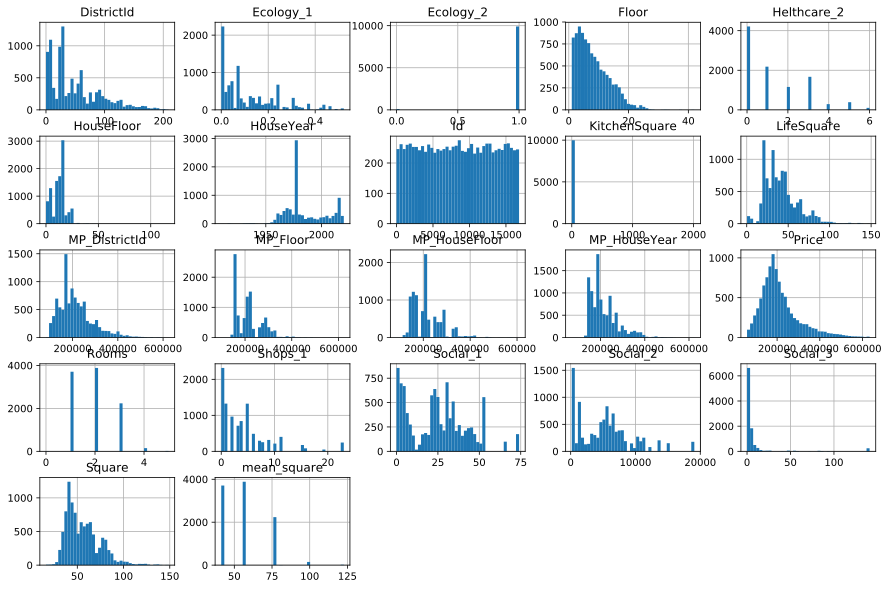

In [60]:
data.hist(bins=40, figsize=(15,10), zorder=2)
plt.show()

In [61]:
def print_unique():
    for feat in data.columns:
        nunique = data[feat].nunique()
        print(f'{feat:15} {nunique:5}', end='')
        unique = '[...]'
        if nunique <= 25:
            unique = data[feat].unique()
            unique.sort()
        print('    ', end='')
        print(unique)

In [62]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9967    [...]
KitchenSquare      58    [...]
Floor              33    [...]
HouseFloor         44    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    [0 1]
Ecology_3           2    ['A' 'B']
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    ['A' 'B']
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]
MP_DistrictId     671    [...]
MP_Floor          132    [...]
MP_HouseFloor     150    [...]
MP_HouseYear      329    [...]


In [63]:
def _ab_to_01(feat):
    try:
        data[feat] = data[feat].replace(['A', 'B'], [0, 1])
    except:
        pass

In [64]:
_ab_to_01('Ecology_2')
_ab_to_01('Ecology_3')
_ab_to_01('Shops_2')

In [65]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9967    [...]
KitchenSquare      58    [...]
Floor              33    [...]
HouseFloor         44    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    [0 1]
Ecology_3           2    [0 1]
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    [0 1]
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]
MP_DistrictId     671    [...]
MP_Floor          132    [...]
MP_HouseFloor     150    [...]
MP_HouseYear      329    [...]


In [66]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square,MP_DistrictId,MP_Floor,MP_HouseFloor,MP_HouseYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,0,11,1,184966.930730,56.790526,213160.076297,218270.298481,205284.081368,196197.638076
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,1,16,1,300009.450063,76.903234,303643.563728,295811.569762,253801.502048,274005.901466
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,1,3,1,220925.908524,56.790526,259938.729121,219421.883789,210406.997916,201183.190845
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,0,5,1,175616.227217,56.790526,172368.882269,219421.883789,206780.946416,188954.114564
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2,4,1,150226.531644,41.323462,155748.415754,161505.304284,168073.796272,170534.786934
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,0,6,1,215898.447742,76.903234,400943.021226,287178.737071,282951.555168,256068.055898
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,1,20,4386,14,1,5,1,296021.204377,56.790526,253795.661825,192305.343292,197127.210562,234683.958943
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,1,1,6,1437,3,0,2,1,221244.156664,56.790526,236250.931918,227274.427710,216541.195097,188954.114564
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,1,1,1,264,0,0,1,1,229102.795999,56.790526,198777.278269,213238.569280,206780.946416,188954.114564
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,1,1,6,1437,3,0,2,1,95380.220993,41.323462,100961.810824,163502.170657,148737.022819,139800.031648


In [67]:
# data.loc[data['HouseFloor'] == 0]
mean_house_floor = data.loc[data['HouseFloor'] != 0]['HouseFloor'].mean()
data.loc[data['HouseFloor'] == 0] = mean_house_floor

In [68]:
data['FloorK'] = data['Floor'] / data['HouseFloor']
data['FloorK'].describe()

count    10000.000000
mean         1.108248
std          2.339362
min          0.050000
25%          0.411765
50%          0.687500
75%          1.000000
max         28.000000
Name: FloorK, dtype: float64

In [69]:
feats = [
#     'DistrictId',
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
#     'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    'Social_3',
#    'Healthcare_1',
    'Helthcare_2',
    'Shops_1',
    'Shops_2',
    'MP_DistrictId',
    'MP_HouseFloor',
    'MP_HouseYear',
#     'FloorK',
    ]

X = pd.DataFrame(data, columns=feats)

def _ctgr(feat):
    try:
        X[feat] = X[feat].astype('category')
    except:
        pass

# _ctgr('DistrictId')
# _ctgr('Rooms')
# _ctgr('Floor')
# _ctgr('FloorRev')
# _ctgr('HouseFloor')
# _ctgr('HouseYear')
# _ctgr('Ecology_2')
# _ctgr('Ecology_3')
# _ctgr('Healthcare_2')
# _ctgr('Shops_1')
# _ctgr('Shops_2')

X = pd.get_dummies(X)
feats = X.columns
X.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,MP_DistrictId,MP_HouseFloor,MP_HouseYear
0,2.0,47.981561,29.442751,6.0,7.0,9.0,0.089040,1.0,1.0,33.0,7976.0,5.0,0.0,11.0,1.0,213160.076297,205284.081368,196197.638076
1,3.0,65.683640,40.049543,8.0,7.0,9.0,0.000070,1.0,1.0,46.0,10309.0,1.0,1.0,16.0,1.0,303643.563728,253801.502048,274005.901466
2,2.0,44.947953,29.197612,0.0,8.0,12.0,0.049637,1.0,1.0,34.0,7759.0,0.0,1.0,3.0,1.0,259938.729121,210406.997916,201183.190845
3,2.0,53.352981,52.731512,9.0,8.0,17.0,0.437885,1.0,1.0,23.0,5735.0,3.0,0.0,5.0,1.0,172368.882269,206780.946416,188954.114564
4,1.0,39.649192,23.776169,7.0,11.0,12.0,0.012339,1.0,1.0,35.0,5776.0,1.0,2.0,4.0,1.0,155748.415754,168073.796272,170534.786934


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null float64
Ecology_3        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null float64
MP_DistrictId    10000 non-null float64
MP_HouseFloor    10000 non-null float64
MP_HouseYear     10000 non-null float64
dtypes: float64(18)
memory usage: 1.4 MB


In [71]:
X.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,MP_DistrictId,MP_HouseFloor,MP_HouseYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.186669,54.647094,39.683669,6.609869,8.632469,12.957969,0.465135,1.311969,1.294169,24.778369,5291.175169,8.273269,1.653369,4.529669,1.248469,208982.089415,208640.900569,209200.055304
std,1.961967,19.087267,19.749013,28.561930,5.212758,6.443457,2.080564,1.938882,1.946241,17.320796,4037.400866,23.658133,2.388868,4.950030,1.964271,81330.650358,69739.040343,72093.261139
min,0.000000,12.957969,0.370619,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.957969,0.000000,0.000000,0.000000,0.000000,12.957969,12.957969,12.957969
25%,1.000000,41.179739,23.769145,1.000000,4.000000,9.000000,0.019509,1.000000,1.000000,9.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,163015.326711,162398.290168,163253.506934
50%,2.000000,51.432753,35.871384,6.000000,8.000000,13.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,197993.344997,205284.081368,194292.898964
75%,3.000000,65.372351,48.751630,9.000000,12.000000,17.000000,0.211401,1.000000,1.000000,35.000000,7227.000000,5.000000,3.000000,6.000000,1.000000,246262.924161,253801.502048,243661.760551
max,12.957969,148.671938,148.179026,2014.000000,42.000000,117.000000,12.957969,12.957969,12.957969,74.000000,19083.000000,141.000000,12.957969,23.000000,12.957969,624156.003381,608674.130507,624156.003381


In [72]:
y = pd.DataFrame(data, columns=['Price'])
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [73]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Price    10000 non-null float64
dtypes: float64(1)
memory usage: 156.2 KB


In [74]:
y.describe()

,Price
count,10000.000000
mean,208640.900569
std,97654.885192
min,12.957969
25%,150535.137200
50%,190256.215966
75%,247263.969719
max,633233.466570


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [76]:
lr = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

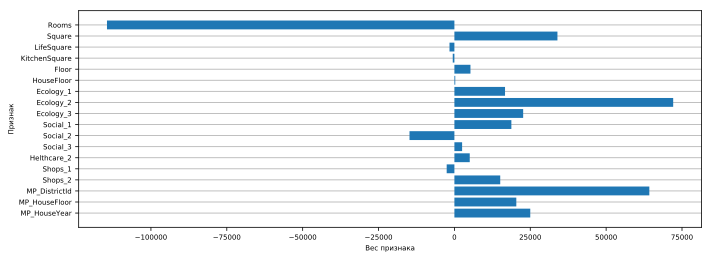

In [77]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["axes.grid"] = True

plt.barh(X_train.columns, lr.coef_.flatten(), zorder=2)
plt.xlabel('Вес признака')
plt.ylabel('Признак')

fig = plt.gcf()
fig.set_size_inches(11.2, 4)
plt.gca().invert_yaxis()

In [78]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    print(1)
    model.fit(X_train.loc[:, feats], y_train)
    print(2)
    y_pred = model.predict(X_test.loc[:, feats])
    print(3)
    ret = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
    return ret

In [79]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

1
2
3


(2124007099.3272789, 0.7706750012357438)